```
Student-1
Name: Fahim Wayez
ID# 21-44499-1
```

```
Student-2
Name: MD. Ferdous Sazid
ID# 21-44455-1
```



*   Mount your google drive.



In [1]:
# mount google drive if you are using Colab
# otherewise, leave it blank

# start writing your code here



*   Import necessary libraries.



In [2]:
# load/import all required library

# start writing your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.exceptions import UndefinedMetricWarning


•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [3]:
# write task-1 solution

# start writing your code here
path = 'projectDataset.csv'
df = pd.read_csv(path)

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [4]:
# write task-2 solution

# start writing your code here

duplicateRows = df[df.duplicated()]
if not duplicateRows.empty:
    print("\nDuplicate Rows:")
    print(duplicateRows)
else:
    print("\nNo duplicate rows found.")

missingValues = df.isnull().sum()
if missingValues.any():
    print("\nMissing Values:")
    print(missingValues)
else:
    print("\nNo missing values found.")

numericColumns = df.select_dtypes(include=['number']).columns
wrongFormats = df[numericColumns].apply(pd.to_numeric, errors='coerce').isnull().sum()
if wrongFormats.any():
    print("\nWrong Numeric Formats:")
    print(wrongFormats)
else:
    print("\nNo wrong numeric formats found.")



No duplicate rows found.

No missing values found.

No wrong numeric formats found.


•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

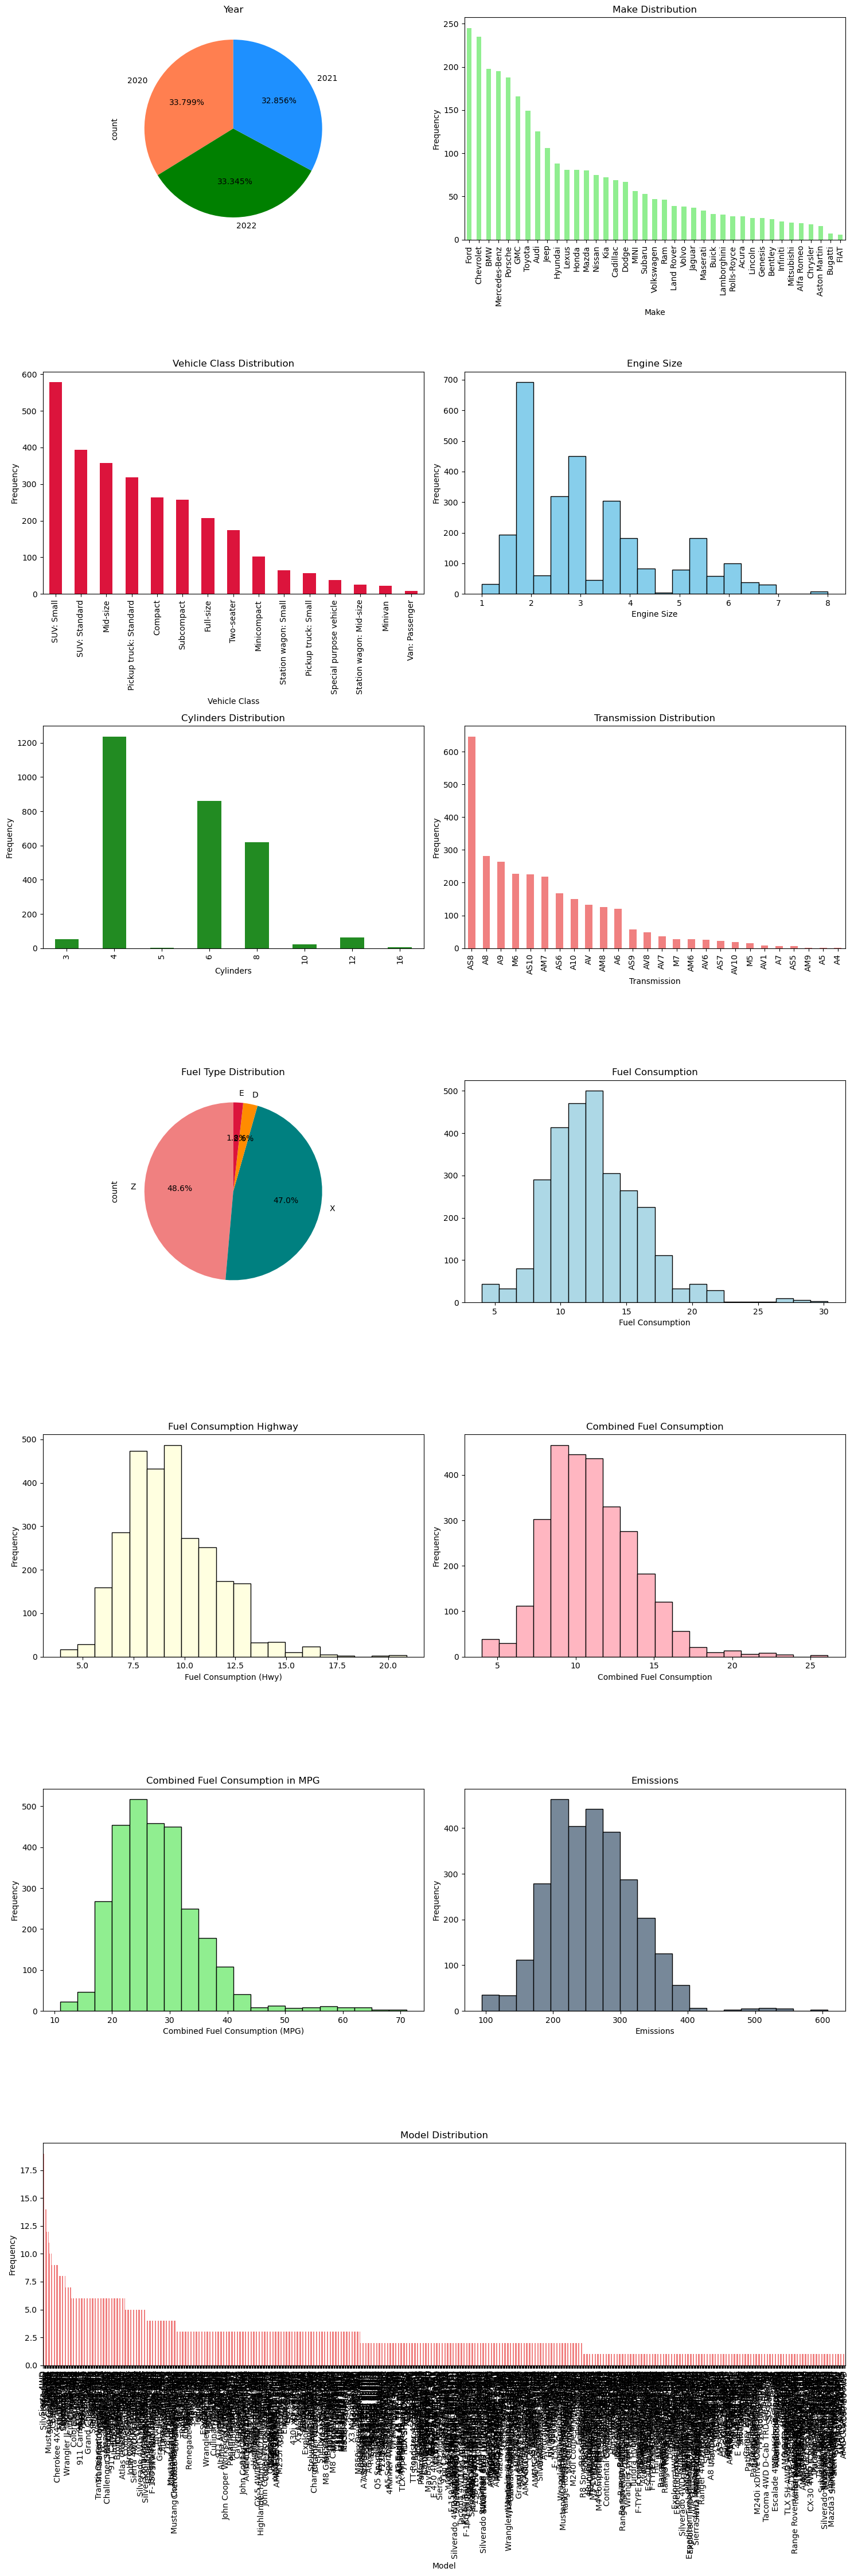

In [5]:
# write task-3 solution

# start writing your code here

plt.figure(figsize=(15, 45))

plt.subplot(7, 2, 1)
df['YEAR'].value_counts().plot(kind='pie', autopct='%0.3f%%', startangle=90, colors=['coral', 'green', 'dodgerblue'])
plt.title('Year')

plt.subplot(7, 2, 2)
df['MAKE'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Make Distribution')
plt.xlabel('Make')
plt.ylabel('Frequency')

plt.subplot(7, 2, 3)
df['VEHICLE CLASS'].value_counts().plot(kind='bar', color='crimson')
plt.title('Vehicle Class Distribution')
plt.xlabel('Vehicle Class')
plt.ylabel('Frequency')

plt.subplot(7, 2, 4)
plt.hist(df['ENGINE SIZE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')

plt.subplot(7, 2, 5)
df['CYLINDERS'].value_counts().sort_index().plot(kind='bar', color='forestgreen')
plt.title('Cylinders Distribution')
plt.xlabel('Cylinders')
plt.ylabel('Frequency')

plt.subplot(7, 2, 6)
df['TRANSMISSION'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Transmission Distribution')
plt.xlabel('Transmission')
plt.ylabel('Frequency')

plt.subplot(7, 2, 7)
df['FUEL'].value_counts().plot(kind='pie', autopct='%0.1f%%', startangle=90, colors=['lightcoral', 'teal', 'darkorange', 'crimson'])
plt.title('Fuel Type Distribution')

plt.subplot(7, 2, 8)
plt.hist(df['FUEL CONSUMPTION'], bins=20, color='lightblue', edgecolor='black') 
plt.title('Fuel Consumption')
plt.xlabel('Fuel Consumption')

plt.subplot(7, 2, 9)
plt.hist(df['HWY (L/100 km)'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Fuel Consumption Highway')
plt.xlabel('Fuel Consumption (Hwy)')
plt.ylabel('Frequency')

plt.subplot(7, 2, 10)
plt.hist(df['COMB (L/100 km)'], bins=20, color='lightpink', edgecolor='black')
plt.title('Combined Fuel Consumption')
plt.xlabel('Combined Fuel Consumption')
plt.ylabel('Frequency')

plt.subplot(7, 2, 11)
plt.hist(df['COMB (mpg)'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Combined Fuel Consumption in MPG')
plt.xlabel('Combined Fuel Consumption (MPG)')
plt.ylabel('Frequency')

plt.subplot(7, 2, 12)
plt.hist(df['EMISSIONS'], bins=20, color='lightslategray', edgecolor='black')
plt.title('Emissions')
plt.xlabel('Emissions')
plt.ylabel('Frequency')

plt.subplot(7, 2, (13,14))
df['MODEL'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Model Distribution')
plt.xlabel('Model')
plt.ylabel('Frequency')

plt.tight_layout()

plt.show()


•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

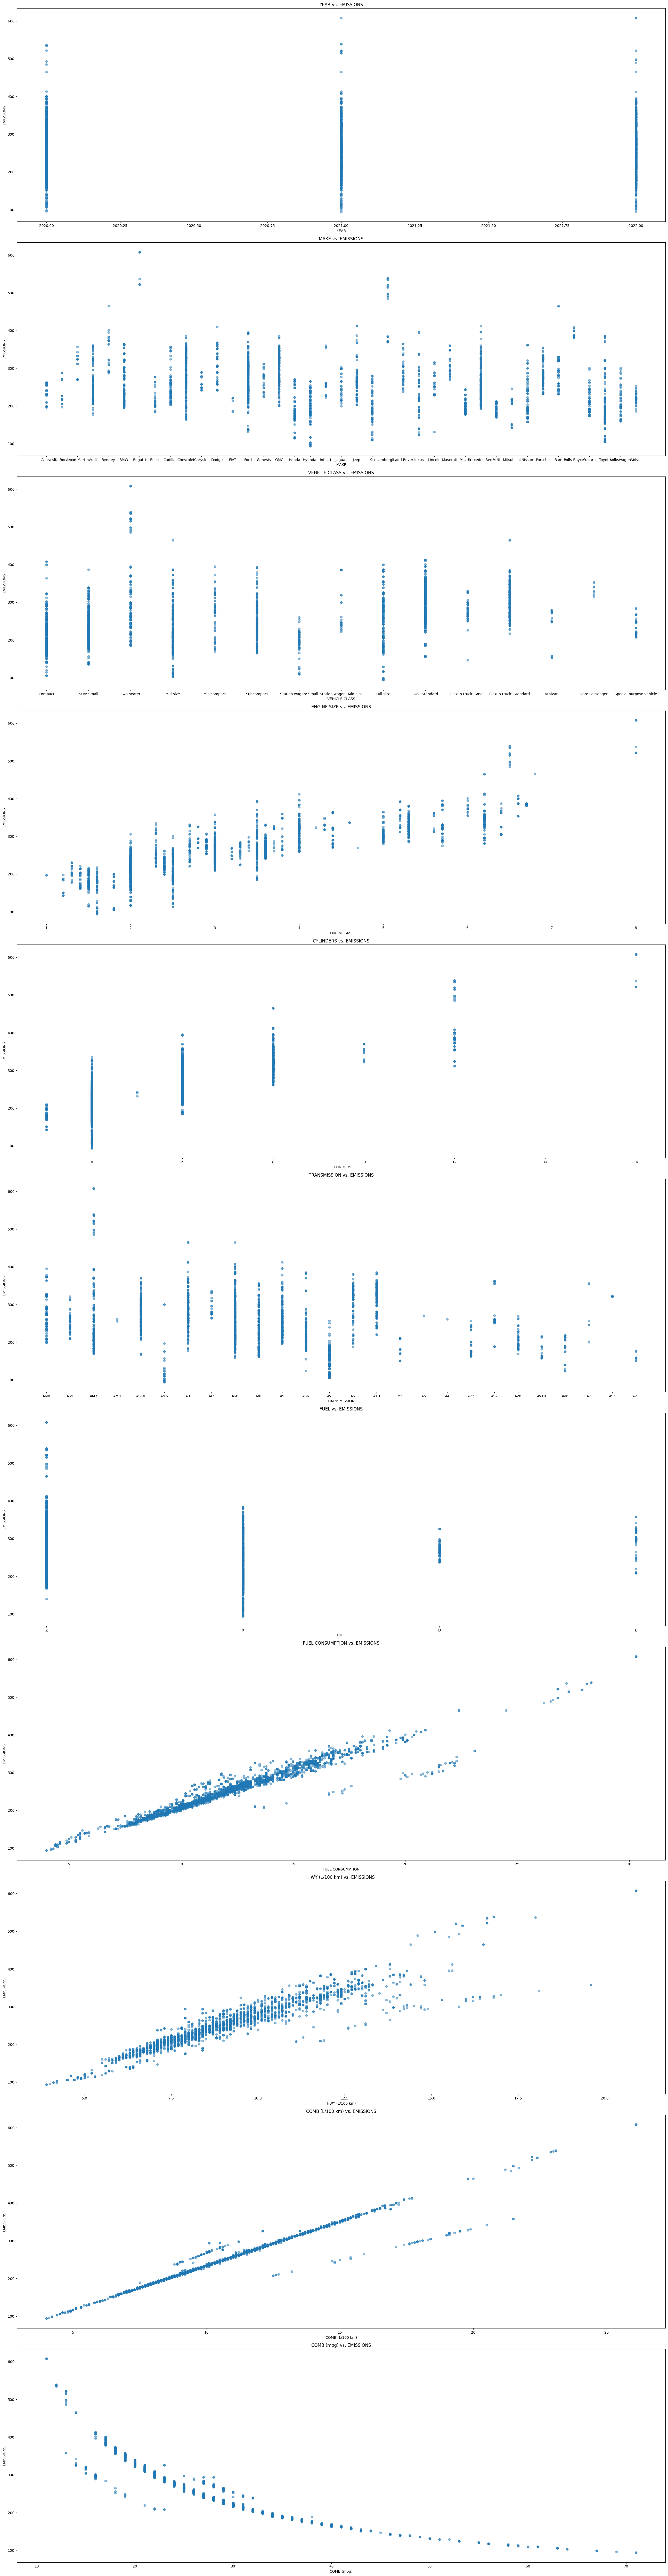

In [6]:
# write task-4 solution

# start writing your code here

correlation = df.corr(numeric_only = True)
correlation
correlation['EMISSIONS']

relationWithEmissions = ['YEAR', 'MAKE', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'COMB (mpg)']

fig, axes = plt.subplots(nrows=len(relationWithEmissions), ncols=1, figsize=(26, 100))

for i, column in enumerate(relationWithEmissions):
    axes[i].scatter(df[column], df['EMISSIONS'], alpha=0.5)
    axes[i].set_title(f'{column} vs. EMISSIONS')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('EMISSIONS')
    
plt.tight_layout()
plt.show()


•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [12]:
# write task-5 solution

# start writing your code here

X = df.drop(columns=['EMISSIONS'])
y = df['EMISSIONS']

labelEncoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    labelEncoders[column] = le
    
scaler = StandardScaler()
XScaled = scaler.fit_transform(X)


•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 123 as the value of the random_state parameter of this function.

In [24]:
# write task-6 solution

# start writing your code here

XTrain, XTest, yTrain, yTest = train_test_split(XScaled, y, test_size=0.005, random_state=123)

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [25]:
# write task-7 solution

# start writing your code here

nbClassifier = GaussianNB()
nbClassifier.fit(XTrain, yTrain)
pred = nbClassifier.predict(XTest)


•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

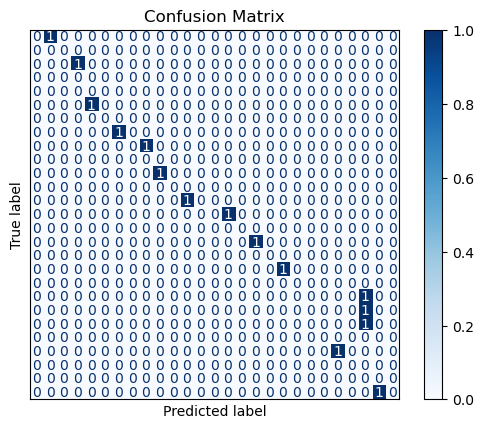

In [26]:
# write task-8 solution

# start writing your code here

cm = metrics.confusion_matrix(yTest, pred)
cmDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cmDisplay.plot(cmap=plt.cm.Blues)  
    
plt.xticks([])  
plt.yticks([])  
plt.title('Confusion Matrix')

plt.show()


•	**Task 9:** Calculate the accuracy, precision, recall and f-1 score of your model.

In [16]:
# write task-9 solution

# start writing your code here

accuracy = accuracy_score(yTest, pred)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(yTest, pred, average='weighted', zero_division=1)
print(f'Precision: {precision:.4f}')

recall = recall_score(yTest, pred, average='weighted', zero_division=1)
print(f'Recall: {recall:.4f}')

f1 = f1_score(yTest, pred, average='weighted')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.2565
Precision: 0.6626
Recall: 0.2565
F1-Score: 0.1996


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [17]:
# write task-10 solution

# start writing your code here

try:
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=UserWarning)
        cvScores = cross_val_score(nbClassifier, XScaled, y, cv=10, scoring='accuracy')

except UndefinedMetricWarning as e:
    print(f"Caught warning: {e}")
    cvScores = []

for i, score in enumerate(cvScores, 1):
    print(f'Fold {i}: Accuracy = {score:.4f}')

averageAccuracy = np.mean(cvScores)
print(f'\nAverage Accuracy Across 10 Folds: {averageAccuracy:.4f}')
print(f'\nNumber of Accuracy used in Average:  {len(cvScores)}')


Fold 1: Accuracy = 0.2787
Fold 2: Accuracy = 0.2857
Fold 3: Accuracy = 0.2683
Fold 4: Accuracy = 0.2509
Fold 5: Accuracy = 0.2867
Fold 6: Accuracy = 0.2832
Fold 7: Accuracy = 0.2657
Fold 8: Accuracy = 0.2657
Fold 9: Accuracy = 0.2832
Fold 10: Accuracy = 0.2517

Average Accuracy Across 10 Folds: 0.2720

Number of Accuracy used in Average:  10
